In [89]:
# Зависимости
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [90]:
# Функция Бута, где во входных параметрах x[0] и x[1] - координаты точки. Глобальный минимум в точке (1,3).
def booth(x) :
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [91]:
# Функция Химмельблау, где во входных параметрах x[0] и x[1] - координаты точки.
# Четыре минимума в точках (3,2), (-2.805118,3.131312), (-3.779310,-3.283186), (3.584428,-1.848126)
def himmel(x) :
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [92]:
#функция матиаса
def matias(x) :
    return 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]

In [93]:
# Задаем функцию для оптимизации
func = himmel

In [94]:
# Задаем границы области определения
xmin, xmax, ymin, ymax = -100, 100, -100, 100

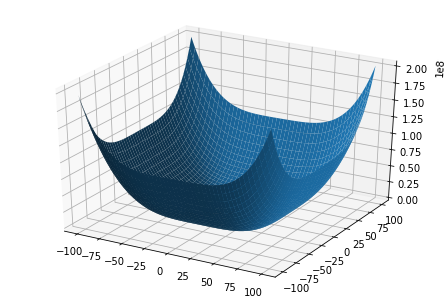

In [95]:
# Посмотрим, как выглядит график функции
# Задаем сетку координат
x = np.arange(xmin, xmax, 0.1)
y = np.arange(ymin, ymax, 0.1)
X, Y = np.meshgrid(x, y)

# Вычисляем значение функции в каждой точке сетки
Z = func([X, Y])

# Выводим график
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()

In [99]:
# Задаем параметры для метода дифференциальной эволюции
bounds = [(xmin, xmax), (ymin, ymax)]
strategy = 'best1bin' # 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'
maxiter = 100
popsize = 20
init = 'random' # 'random'
mutation = 0.75 #при "0,5" цикл совершил 6 попыток и нашел 4 минимума;при "1" цикл совершил 52 попытки, прежде чем нашел 4 минимума: при "1.5" цикл совершил 101 попутку и нашел 0 минимумов. чем выше mutation, то из-за коэффициента случайных изменений векторов найти минимумы сложнее
recombination = 0.75 #при "0.25" потребовалось 24 сек и ничего не нашел, при "0.5" потребовалась 24 сек и ничего не нашел, при "0.75" потребовалось 24 сек и нашел 2 минимума; при увеличении вероятности рекомбинации повышается скорость нахождения минимумов 

In [97]:
# Запускаем алгоритм
result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, popsize=popsize, init=init, mutation=mutation, recombination=recombination, disp=False)

# Выводим результаты: координаты найденного минимума, значение оптимизируемой функции в нём, число поколений
print(result.x[0], result.x[1])
print(result.fun)
print(result.nit)

2.9999999999537286 2.000000000088975
1.3145979539393348e-19
100


In [100]:
# Только для функции Химмельблау!
# Поиск всех четырех минимумов
minimums = []
attempts = 0
while len(minimums) < 4 :
    result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, popsize=popsize, init=init, mutation=mutation, recombination=recombination, disp=False)
    attempts += 1
    point = (round(result.x[0], 4), round(result.x[1], 4))
    if result.success and point not in minimums :
        minimums.append(point)
    if attempts > 100 :
        break

print(minimums)
print(attempts)

[(-2.8051, 3.1313)]
101
